<a href="https://colab.research.google.com/github/Rodrigoalvort/AMNjs_course_Capstone/blob/master/v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [1]:
!pip install pytube3
!pip install imagehash
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from glob import glob
from google.colab import files
# %no tensorflow_version 1.x
%tensorflow_version 2.x
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,ReLU
from tensorflow.keras.optimizers import SGD
import math,time
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k
import tensorflow
import random
from google.colab import drive
import tensorflow as tf
from IPython.display import HTML
from base64 import b64encode
from pytube import Playlist,YouTube
from multiprocessing import Process, Queue
from PIL import Image
from google.colab import drive
import imagehash

print(tf.__version__)

2.2.0


In [2]:
playlist = Playlist("https://www.youtube.com/playlist?list=PLomN84AdULID9R9fvCu655Zfr5O1nQ3yD")
for video in playlist:
  try:
    yt =YouTube(video)

    a = yt.streams.get_highest_resolution()
    # time.sleep(1)
    a.download()
  except:
    pass

HTTPError: ignored

In [2]:
!git clone https://github.com/google/fonts.git
WIDTH=128
HEIGHT=64
WIDTH_BACK=128
HEIGHT_BACK=64

paths=glob('**/*.ttf', recursive=True)
fnts=[]
for fnt in paths:
  fnts.append(ImageFont.truetype(fnt, 20))


fatal: destination path 'fonts' already exists and is not an empty directory.


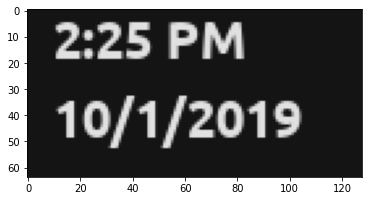

In [3]:

def generateImage(text,text2,fnt,color,color_back,x_margin=10,y_margin=0):
  array=np.ones((HEIGHT,WIDTH,4),dtype='uint8')
  
  array[:,:,0:3]=array[:,:,0:3]*color_back
  array[:,:,-1]=array[:,:,-1]*255 


  base = Image.fromarray(array)
  txt = Image.new('RGBA', base.size, (color,color,color,0))
  # fnt = ImageFont.truetype('segoe-ui.ttf', 20)
  # fnt = ImageFont.truetype('./fonts/ofl/londrinasolid/LondrinaSolid-Black.ttf', 20)
  d = ImageDraw.Draw(txt)
  d.text((x_margin,y_margin), text, font=fnt, fill=(color,color,color,255))
  d.text((x_margin,30), text2, font=fnt, fill=(color,color,color,255))
  out = Image.alpha_composite(base, txt)
  return np.array(out) 


def showimages(data):
    l = data.shape[0]
    
    a = int(l**0.5) if l**0.5%1==0 else int(l**0.5)+1
    if len(data.shape)==4:
      result = np.zeros((a*data.shape[1],a*data.shape[2],data.shape[3]),dtype='uint8')
      for idx,img  in enumerate(data):
        y1,y2,x1,x2 =int(idx/a)*data.shape[1],int(1+idx/a)*data.shape[1],data.shape[2]*(idx%a),data.shape[2]*(idx%a+1) 
        result[y1:y2,x1:x2,:] = img
      plt.figure(figsize=(20,20))
      plt.imshow(result[:,:,0],'gray')
  
    else:
      result = np.zeros((a*data.shape[1],a*data.shape[2]),dtype='uint8')
      for idx,img  in enumerate(data):
          y1,y2,x1,x2 =int(idx/a)*data.shape[1],int(1+idx/a)*data.shape[1],data.shape[2]*(idx%a),data.shape[2]*(idx%a+1) 
          result[y1:y2,x1:x2] = img
      plt.figure(figsize=(20,20))
      plt.imshow(result,'gray')
      
    plt.axis('off')


img = generateImage('2:25 PM','10/1/2019',fnts[5],225,20)
plt.imshow(img)




In [4]:
tensorflow.keras.backend.clear_session()
k.clear_session()
main_input = Input(shape=(64,128,1), name='main_input')
x= BatchNormalization()(main_input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= BatchNormalization()(x)
x =Flatten()(x)
x =Dense(64, activation='relu')(x)
x= BatchNormalization()(x)
hour_output =Dense(24, activation='softmax', name='hour_output')(x)
minute_output =Dense(60, activation='softmax', name='minute_output')(x)

model = Model(inputs=[main_input], outputs=[hour_output,minute_output])
# model.compile(optimizer='adam', loss='binary_crossentropy')
# model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.compile(optimizer='adam',
              loss={'hour_output': 'categorical_crossentropy', 'minute_output': 'categorical_crossentropy'},metrics=['acc'])


# And trained it via:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 128, 1)] 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 1)   4           main_input[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 126, 32)  320         batch_normalization[0][0]        
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 63, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________

In [0]:
print(video_images.shape,images.shape)
bks=[]
for i in range(50):
  factor = np.random.uniform(low=0.6, high=.95, size=None)
  img = cv2.resize(images[i,:,:,0],None,fx=factor,fy=factor)
  
  x_margin= np.random.randint(0,WIDTH-img.shape[1])
  y_margin= np.random.randint(0,HEIGHT -img.shape[0])
  bk= 255-video_images[i,:,:].copy()
  bk[y_margin:y_margin+img.shape[0],x_margin:x_margin+img.shape[1]] =img
  bks.append(bk)
showimages(np.asarray(bks))


In [0]:


paths_v=glob('**/*.mp4', recursive=True)
def f(q,paths):
    for path in paths:
      cap = cv2.VideoCapture(path)
      ret =True
      while ret:
          ret, frame = cap.read()
          if  not ret:
              break
          x_m= np.random.randint(WIDTH,frame.shape[1])
          y_m= np.random.randint(HEIGHT,frame.shape[0])
          time_img =frame[y_m-HEIGHT:y_m,x_m-WIDTH:x_m,:]
          q.put((False,time_img))
      cap.release()
    q.put((True,None))

q = Queue(512)
p = Process(target=f, args=(q,paths_v))
p.start()


ini= time.time()
cnt =0
try:
  while True:
      if cnt%1000==0:
          print (q.qsize(),cnt,cnt/(time.time()-ini))
      ret,frame = q.get()

      if ret:
          break
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      gray=cv2.resize(gray,(128,64))
      video_images[cnt,:,:,0] = gray.astype('float32')
      cnt+=1
      if cnt>=limit:
          break
  p.join()
  p.terminate()
  del q

except Exception as e:
  print(e)
  del q
  p.join()
  p.terminate()


In [0]:
from tensorflow.keras.utils import Sequence

class MySequence(Sequence):

    def __init__(self, epoch_size, batch_size):
        self.batch_size = batch_size
        self.epoch_size = epoch_size

    def __len__(self):
        return math.ceil(self.epoch_size / self.batch_size)

    def __getitem__(self, idx):
      images= np.zeros((self.batch_size,HEIGHT,WIDTH,1))
      hours = []
      minutes = []
      idx=0
      complements= ['', ' AM',' PM',' am',' pm']
          
      while idx<self.batch_size:
        try:
          fnt_num =np.random.randint(len(fnts))
          hour=  np.random.randint(1,25)
          minute = np.random.randint(60)
          comp ='' if minute>9 else '0'
          hour_text =str(hour)+':'+comp+ str(minute)+random.choice(complements)
          w,h=fnts[fnt_num].getsize(hour_text)
          x_margin= np.random.randint(0,WIDTH-w)
          y_margin= np.random.randint(0,HEIGHT/2-h)
          
          day=  str(np.random.randint(1,32))
          month = str(np.random.randint(1,13))
          year = str(np.random.randint(2020,2030))
          year_text = day+'/'+month+'/'+year

          color = np.random.randint(192,254)
          color_back = np.random.randint(0,48)
          img=generateImage(hour_text,year_text,fnts[fnt_num],color=color,color_back=color_back,x_margin=x_margin,y_margin=y_margin)
          images[idx,:,:,0] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #+ np.random.randint(0, high=20, size=(HEIGHT,WIDTH), dtype='uint8')
          hours.append(hour)
          minutes.append(minute)
          idx+=1

        except Exception as e:
          pass
      return images,{'hour_output': to_categorical(np.asanyarray(hours)-1, num_classes=24, dtype='float32'),
                       'minute_output': to_categorical(minutes, num_classes=60, dtype='float32')} 


In [0]:

history = model.fit(MySequence(250000,32),
          epochs=10, batch_size=32,use_multiprocessing=False)

# history = model.fit({'main_input': images},
#           {'hour_output': hours_categorical, 'minute_output': minutes_categorical},
#           epochs=10, batch_size=32,validation_split=0.15)

Epoch 1/10
 174/7813 [..............................] - ETA: 31:44 - loss: 7.4959 - hour_output_loss: 3.2825 - minute_output_loss: 4.2134 - hour_output_acc: 0.0462 - minute_output_acc: 0.0176

In [0]:
plt.plot(history.history['minute_output_acc'])
plt.plot(history.history['val_minute_output_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['minute_output_loss'])
plt.plot(history.history['val_minute_output_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
num_samples= 5000
test_images= np.zeros((num_samples,HEIGHT,WIDTH,1))
test_hours = []
test_minutes = []
idx=0
complements= ['', ' AM',' PM',' am',' pm']
for i in range(num_samples):
  spaces =np.random.randint(0,2)
  hour=  np.random.randint(1,25)
  minute = np.random.randint(60)
  comp ='' if minute>9 else '0'
  
  day=  str(np.random.randint(1,32))
  month = str(np.random.randint(1,13))
  fnt_num =np.random.randint(len(fnts))
  
  color = np.random.randint(128,254)
  color_back = np.random.randint(0,64)
  try:
    img=generateImage(spaces*' '+ str(hour)+':'+comp+ str(minute)+random.choice(complements), day+'/'+month+'/2019',fnts[fnt_num],color=color,color_back=color_back)
    test_images[idx,:,:,0] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    idx+=1
    test_hours.append(hour)
    test_minutes.append(minute)
  except:
    pass

test_images=test_images[:idx,:,:,:]
test_images=test_images[:idx,:,:,:]
test_hours_categorical =to_categorical(np.asarray(test_hours)-1, num_classes=24, dtype='float32')
test_minutes_categorical =to_categorical(test_minutes, num_classes=60, dtype='float32')
model.evaluate({'main_input': test_images},
          {'hour_output': test_hours_categorical, 'minute_output': test_minutes_categorical},verbose=1)

In [0]:
results = model.predict({'main_input': test_images})
plt.figure(figsize=(10,20))
print(results[0].shape,results[1].shape)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(test_images[i,:,:,0],'gray')
  plt.title(str(np.argmax(results[0][i,:])+1)+':'+str(np.argmax(results[1][i,:])))
# plt.plot(np.argmax(results[1],axis=1))


In [0]:
results = model.predict({'main_input': test_images})
hour_results=np.argmax(results[0],axis=1)
errors_idx=hour_results!=test_hours
error_images =test_images[errors_idx,:,:,:]
error_hours = np.asarray(test_hours)[errors_idx]
error_minutes = np.asarray(test_minutes)[errors_idx]

print(error_images.shape)
plt.figure(figsize=(20,20))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(error_images[i,:,:,0],'gray')
  plt.title(str(error_hours[i])+str(error_minutes[i]))

In [0]:
model.save('mymodel.h5')
files.download('mymodel.h5') 

In [0]:
uploaded = files.upload()

In [0]:
cap = cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/time/output4.avi')
video_images=[]
while True:
  ret, frame = cap.read()
  if  not ret:
    break
  time =frame[730:,1250:1320,:]
  resized_test_img=cv2.resize(time,(128,64))
  gray = cv2.cvtColor(resized_test_img, cv2.COLOR_BGR2GRAY).astype('float32')
  # ret,gray= cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
  # gray[32:,:]=0
  # gray[:,64:]=0
  
  video_images.append(gray)

  # result = model.predict(gray.reshape((1,64,128,1)))
  # print(np.argmax(result[0]),np.argmax(result[1]))
video_images= np.asarray(video_images)
video_images= video_images.reshape((video_images.shape[0],64,128,1))
# plt.imshow(gray,'gray')
print(video_images.shape)
showimages(video_images[::25,:,:,:])


In [0]:
results = model.predict({'main_input': video_images},batch_size=32)
plt.figure(figsize=(10,10))
plt.plot(np.argmax(results[0],axis=1))
plt.plot(np.argmax(results[1],axis=1))
plt.grid()
print(np.argmax(results[1],axis=1))

In [0]:
! pip install pytube3

In [0]:
test_desktop=np.load('/content/drive/My Drive/Colab Notebooks/time/test.npy')


In [0]:
test_desktop.shape

In [0]:
showimages(test_desktop[:1440:25,:,:,:])

In [0]:
results = model.predict({'main_input': test_desktop},batch_size=32)
plt.figure(figsize=(20,10))
plt.plot(np.argmax(results[0][:100,:],axis=1))
plt.plot(np.argmax(results[1][:100,:],axis=1))
plt.grid()
print(np.argmax(results[1],axis=1))

In [0]:
# # แสดงผลด้วย vdo tag    ใครงง ก็ไปเรียน HTML ใน Sololearn ได้
# mp4 = open('Curso de Windows 10 Vídeo 108 Complemento del teléfono.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=1000 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

drive.mount('/content/drive', force_remount=True)

In [0]:

def compareIamges(im1,im2):
    diff = np.mean(np.absolute(im2-im1))
    return diff
# cap = cv2.VideoCapture('Curso de Windows 10 Vídeo 133 Personalizar usando temas.mp4')
# cap = cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/time/output4.avi')
cap = cv2.VideoCapture('/content/Curso de Windows 10 1 Novedades de Windows 10.mp4')

_, im1 = cap.read()

im1_pillow= Image.fromarray(im1)

hashs=[]
diff=[]
diff_ph=[]
while True:
    ret, im2 = cap.read()

    if  not ret:
        break
    im2_pillow= Image.fromarray(im2)

    hash1 = imagehash.average_hash(im1_pillow)
    hash2 = imagehash.average_hash(im2_pillow)
    hashs.append(hash1)
    diff.append(compareIamges(im1,im2))
    diff_ph.append(hash2-hash1)
    im1=im2
    im1_pillow=im2_pillow
    
    
diff=np.asarray(diff)
diff_ph=np.asarray(diff_ph)
plt.figure(figsize=(20,20))
# plt.plot(hashs)
print(np.corrcoef(diff- np.mean(diff),diff_ph- np.mean(diff_ph)))
plt.subplot(211)
plt.plot(diff,'.')
plt.subplot(212)
# plt.plot(diff_ph,'.')

plt.hist(diff,bins=100)
plt.yscale('log')
